# VQE Demo: He-H+

# Setup

In [ ]:
import Qconfig
from qiskit import register

token_sum = 0
for x in Qconfig.APItoken:
    token_sum = int(x, 16) + token_sum

if token_sum == 887:
    print('ISCA-2018 tutorial APItoken setup: Success')
    register(Qconfig.APItoken)
else:
    print('ISCA-2018 tutorial APItoken setup: Fail')

***

# Scaffold Code

<img src="VQE_Demo_Files/WholeCircuitStep3.png">

In [ ]:
# Use this cell as your workspace for writing your Scaffold code.
# If you get stuck, refer to the section at the end for solutions.
scaffold_code = """
const double alpha0 = 0.0, beta0 = 0.0, gamma0 = 0.0, delta0 = 0.0, epsilon0 = 0.0;
const double alpha1 = 0.0, beta1 = 0.0, gamma1 = 0.0, delta1 = 0.0, epsilon1 = 0.0;

module initialRotations(qbit reg[2]) {
  Rx(reg[0], alpha0);
  Rx(reg[1], alpha1);

  Rz(reg[0], beta0);
  Rz(reg[1], beta1);
}

module entangler(qbit reg[2]) {
  // IMPLEMENT THIS
}


module finalRotations(qbit reg[2]) {
  Rz(reg[0], gamma0);
  Rz(reg[1], gamma1);

  Rx(reg[0], delta0);
  Rx(reg[1], delta1);

  Rz(reg[0], epsilon0);
  Rz(reg[1], epsilon1);
}

module prepareAnsatz(qbit reg[2]) {
  initialRotations(reg);
  entangler(reg);
  finalRotations(reg);
}

module measure(qbit reg[2], cbit result[2]) {
  // IMPLEMENT THIS
}

int main() {
  qbit reg[2];
  cbit result[2];
  
  prepareAnsatz(reg);
  measure(reg, result);

  return 0;
}
"""

***

# Executing it!

In [6]:
# Compile the Scaffold to OpenQASM
from scaffcc_interface import ScaffCC
openqasm = ScaffCC(scaffold_code).get_openqasm()
print(openqasm)

OPENQASM 2.0;
include "qelib1.inc";
qreg reg[2];
creg result[2];
rx(0.000000e+00) reg[0];
rx(0.000000e+00) reg[1];
rz(0.000000e+00) reg[0];
rz(0.000000e+00) reg[1];
h reg[0];
cx reg[0],reg[1];
h reg[1];
cx reg[1],reg[0];
rz(0.000000e+00) reg[0];
rz(0.000000e+00) reg[1];
rx(0.000000e+00) reg[0];
rx(0.000000e+00) reg[1];
rz(0.000000e+00) reg[0];
rz(0.000000e+00) reg[1];
measure reg[0] -> result[0];
measure reg[1] -> result[1];




### Execute on a Simulator

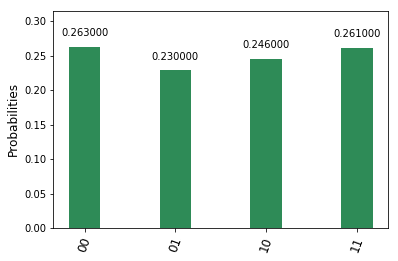

Expected value for sigma_z I is : -0.014


In [7]:
%matplotlib inline
from qiskit import load_qasm_string, available_backends, execute, get_backend
vqe_circ = load_qasm_string(openqasm)

num_shots = 1000
result = execute(vqe_circ, backend='local_qasm_simulator', shots=num_shots).result()

counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

expected_value = (counts['00'] + counts['01'] - counts['10'] - counts['11']) / num_shots
print('Expected value for sigma_z I is : %s' % expected_value)

Pick your own angles! Largest expected value ($\sigma_z I$ has negative coefficient) wins.

### Execute on a Quantum Computer (if/when it is your turn)

In [ ]:
available_backends()

In [ ]:
num_shots = 1000
device = get_backend('ibmqx4')
job = execute(vqe_circ, device, shots=num_shots)

import time
job_poll_interval = 30
lapse = 0
while not job.done:
    try:
        print("({0} seconds) {1}".format(lapse * job_poll_interval, job.status['status']), end='')
        print(", your position: {}".format(job.status['queue_position']), end='')
        print(", jobs in queue: {}".format(device.status['pending_jobs']))
    except:
        print('')
    time.sleep(job_poll_interval)
    lapse += 1

device_result = job.result()
device_counts = device_result.get_counts()
plot_histogram(device_counts)    
expected_value = (device_counts['00'] + device_counts['01'] - device_counts['10'] - device_counts['11']) / num_shots
print('Expected value for sigma_z I is : %s' % expected_value)

***

# Solutions (to view, run the cell)

In [3]:
# code for entangler( )
with open('VQE_Demo_Files/entangler.txt','r') as f:
    print(f.read())

module entangler(qbit reg[2]) {
  H(reg[0]);
  CNOT(reg[0], reg[1]);
  
  H(reg[1]);
  CNOT(reg[1], reg[0]);
}



In [2]:
# code for measure( )
with open('VQE_Demo_Files/measure.txt','r') as f:
    print(f.read())

module measure(qbit reg[2], cbit result[2]) {
  result[0] = MeasZ(reg[0]);
  result[1] = MeasZ(reg[1]);
}



In [5]:
# full solution for scaffold_code
with open('VQE_Demo_Files/solution.txt','r') as f:
    print(f.read())

const double alpha0 = 0.0, beta0 = 0.0, gamma0 = 0.0, delta0 = 0.0, epsilon0 = 0.0;
const double alpha1 = 0.0, beta1 = 0.0, gamma1 = 0.0, delta1 = 0.0, epsilon1 = 0.0;

module initialRotations(qbit reg[2]) {
  Rx(reg[0], alpha0);
  Rx(reg[1], alpha1);

  Rz(reg[0], beta0);
  Rz(reg[1], beta1);
}

module entangler(qbit reg[2]) {
  H(reg[0]);
  CNOT(reg[0], reg[1]);

  H(reg[1]);
  CNOT(reg[1], reg[0]);
}

module finalRotations(qbit reg[2]) {
  Rz(reg[0], gamma0);
  Rz(reg[1], gamma1);

  Rx(reg[0], delta0);
  Rx(reg[1], delta1);

  Rz(reg[0], epsilon0);
  Rz(reg[1], epsilon1);
}

module prepareAnsatz(qbit reg[2]) {
  initialRotations(reg);
  entangler(reg);
  finalRotations(reg);
}

module measure(qbit reg[2], cbit result[2]) {
  result[0] = MeasZ(reg[0]);
  result[1] = MeasZ(reg[1]);
}

int main() {
  qbit reg[2];
  cbit result[2];

  prepareAnsatz(reg);
  measure(reg, result);

  return 0;
}



***

# Circuit Visualization [Optional]

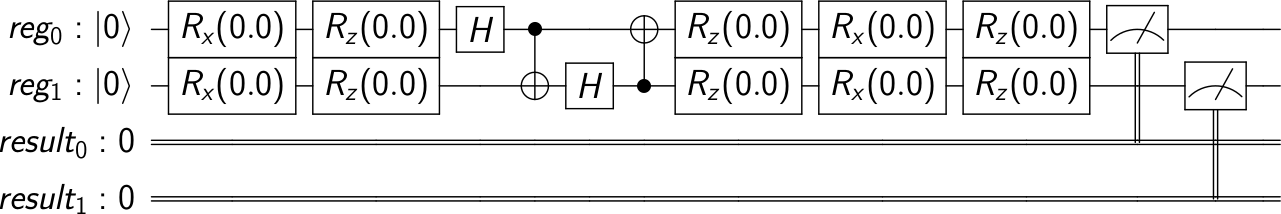

In [8]:
from qiskit.tools.visualization import circuit_drawer
circuit_drawer(vqe_circ)